In [19]:
import numpy as np
import matplotlib.pyplot as plt

In a neural network, the input matrix is often represented as a **row vector**, where each element of the vector represents a feature. However, in order to perform matrix multiplication with the weights matrix, the input matrix must be transposed to a **column vector**.

The reason for transposing the input matrix is related to the way **matrix multiplication** works. When two matrices are multiplied, the number of columns in the first matrix must match the number of rows in the second matrix. In a neural network, **the input matrix represents a single training example, with each feature represented as a row vector.** The weights matrix represents the connections between the input and hidden layers of the network, with each row of the weights matrix corresponding to a single neuron in the hidden layer.

To perform matrix multiplication between the input matrix and the weights matrix, the input matrix **needs to be transposed to a column vector**, *so that* the **number of columns matches the number of rows in the weights matrix**. The resulting product of the transpose of the input matrix and the weights matrix is a column vector, which represents the output of the hidden layer.

In summary, the input matrix is transposed in a neural network before it is multiplied to the weights matrix in order to perform matrix multiplication that represents the connections between the input and hidden layers of the network. The resulting product is a column vector, which represents the output of the hidden layer.

In [20]:
# Example
# Here we initialize a row vector of shape (1,5) , in which each element represents a feature
X = np.array([np.linspace(0,100,5)])
X

array([[  0.,  25.,  50.,  75., 100.]])

In [21]:
X.shape

(1, 5)

In [22]:
# We transpose our feature vector to a column vector 
# to prepare for matrix multiplication
X = X.T
X

array([[  0.],
       [ 25.],
       [ 50.],
       [ 75.],
       [100.]])

This means that our input layer will have 5 neurons in it, arranged as a column vector.

In [23]:
# Example 2
# We have an array of 3 examples, 2 elements per example
X_2 = np.array([[3,5], [5,1], [10,2]], dtype=float)
X_2.shape

(3, 2)

In [24]:
X_2transposed = X_2.T
X_2transposed

array([[ 3.,  5., 10.],
       [ 5.,  1.,  2.]])

In [25]:
X_2transposed.shape

(2, 3)

This means that if we have 2 input features per example, our input layer will have 2 neurons. 

- **3**, **5**, and **10** will go to the **first** neuron
- **5**,**1,** and **10** will go to the **second** neuron.

**Data**

Our data is composed of two input variables and one output variable. Our two input variables are **hours of sleep** and **hours of study**, while our output variable is **score on test**.

We initially have three examples.

In [26]:
X = np.array([[3,5], [5,1], [10,2]], dtype=float)
y = np.array([[75],[82],[93]], dtype=float)

print(X)
print(y)

[[ 3.  5.]
 [ 5.  1.]
 [10.  2.]]
[[75.]
 [82.]
 [93.]]


Our inputs are now arranged per example, with each example containing 2 features. In application, we do not need to specifically transpose our input data if it is laid out per example. Our neural network that we will build will be the one to take the first element of each example and pass it as an input to the first neuron of the first layer, while the second element will be passed as an input to the second neuron of the first layer.

**Scaling our data through Min-max Normalization**

We need to scale our data, because our input is in the range of single values, while our output is in the range of two digit values. This will help our neural network learn better.

In [27]:
X = (X - X.min()) / (X.max() - X.min())
X 

array([[0.22222222, 0.44444444],
       [0.44444444, 0.        ],
       [1.        , 0.11111111]])

In [28]:
y = (y - y.min()) / (y.max() - y.min())
y

array([[0.        ],
       [0.38888889],
       [1.        ]])

Now our input and output features are of the same scale.

**Creating a Neural Network class in Python**

**Things to Remember:**

1. Our input matrix is in the shape of (number of examples, number of features).
2. Our weights matrix is in the shape of (number of neurons of the previous layer, number of neurons of the next layer).
3. Our hidden layer is in the shape of (number of examples, number of neurons in the hidden layer).

In [29]:
class Neural_Network():
    def __init__(self):
        # Define hyperparameters
        self.input_layer_size = 2
        self.output_layer_size = 1
        self.hidden_layer_size = 3

        # Weights (parameters)
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        # self.bias = np.random.randn(1, dtype=float)
    def forward(self, X):
        # Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)

        return yHat
    
    def sigmoid(self,z):
        #applies sigmoid function element-wise, and returns the same shape as the input
        return 1 / 1 + np.exp(-z)
        

**Forward Propagation Notation of our Neural Network**

$$ z^{(2)} = X^{T} \cdot W^{(1)} $$

$$ a^{(2)} = f(z^{(2)})  $$

$$ z^{(3)} = a^{(3)} \cdot W^{(2)} $$

$$ \hat{y} = f(z^{(3)}) $$

In [30]:
X

array([[0.22222222, 0.44444444],
       [0.44444444, 0.        ],
       [1.        , 0.11111111]])

In [31]:
NN = Neural_Network()
yhat = NN.forward(X)

In [32]:
yhat

array([[19.38427661],
       [52.29225278],
       [77.57190155]])

In [33]:
y

array([[0.        ],
       [0.38888889],
       [1.        ]])

Our predictions are still far from our true value since we have not trained our network.

**Training our Network**

It means minimizing a cost function, or the difference between our predictions and the true value.

Our cost is a function of two things: **our examples, and the weights of our synapses**. We don't have much control on our data, but we can minimize the cost by changing the weights.

$$ J(cost) = \sum \frac{1}{2} (y - \hat{y})^{2} $$

For our first weights matrix, `W1`, it has 9 weights in it. Say, we want to know how fast can we test some values to minimize the cost for **one** weight:

In [34]:
import time

weights_to_try = np.linspace(-5, 5, 1000)
costs = np.zeros(1000)

start = time.time()
for i in range(1000):
    NN.W1[0,0] = weights_to_try[i]
    yhat = NN.forward(X)
    costs[i] = 0.5 * sum((y-yhat)**2)

end = time.time()

In [35]:
time_elapsed = end - start
time_elapsed

0.03986549377441406

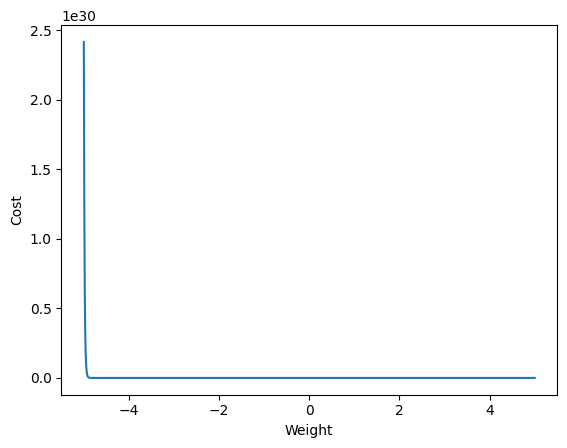

In [36]:
plt.plot(weights_to_try, costs)
plt.ylabel('Cost')
plt.xlabel('Weight')
plt.show()

Say, we want to know two weights:

In [38]:
import time

weights_to_try = np.linspace(-5, 5, 1000)
costs = np.zeros((1000,1000))

start = time.time()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weights_to_try[i]
        NN.W1[0,1] = weights_to_try[i]
        yhat = NN.forward(X)
        costs[i] = 0.5 * sum((y-yhat)**2)

end = time.time()

In [39]:
time_elapsed = end - start
time_elapsed

24.67851948738098

As we continue to add dimensions, searching through all 9 weights will take more than a lifetime.

In [40]:
print(f"{0.04*(1000**(9-1))/(3600*24*365)} years.")

1268391679350583.5 years.


$$ z^{(2)} = X^{T} \cdot W^{(1)} $$

$$ a^{(2)} = f(z^{(2)})  $$

$$ z^{(3)} = a^{(3)} \cdot W^{(2)} $$

$$ \hat{y} = f(z^{(3)}) $$

$$ J(cost) = \sum \frac{1}{2} (y - \hat{y})^{2} $$

$$ J = \sum \frac{1}{2} (y -f(f(X^{T} \cdot W^{(1)}) W^{(2)}))^{2} $$

Now, we have one big equation that uniquely determines our cost **J** from X, y, W1 and W2, we can use calculus to find exactly what we're looking for.

We want to know which way is downhill, that is what is the **rate of change of J with respect to W**, or $\frac {dJ}{dW}$.

And in this case, since we are only considering one weight at a time, this is a partial derivative.

$$\frac {\partial J}{\partial W} $$

We can derive an expression for $\frac {\partial J}{\partial W} $ that will give us the rate of change of J with respect to W for any value of W.

If $\frac {\partial J}{\partial W} = + $, then the cost function is going uphill.

If $\frac {\partial J}{\partial W} = - $, then the cost function is going downhill.

Now we can speed things up. Since we know which direction the cost decreases, we can save the time we would have used searching in the wrong direction. We can save more computational time by iteratively taking steps downhill, and stopping when the cost gets to **0**.

This method is called **Gradient Descent**. Although it may not look impressive in one dimension, it can incredibly speed up things in the higher dimension. Gradient descent allows us to find needles in very, very, very large haystack.

But there is a restriction. What if the cost function does not always go in the same direction. What if it goes up, then back down. The mathematical name for this path is called **non-convex**. And it could get gradient descent stuck in a **local minimum**, instead of the **global minimum**.

One of the reasons that we choose our cost function to be the sum of square errors is to exploit the nature of quadratic equations. We know that the graph of $y=x^{2}$ is a nice convex parabola, and it turns out to be also true in higher dimensions (but not always).

Another piece of the puzzle is, depending on how we use our data, it might not matter if our function is convex or not.

If we use our examples one at a time, instead of all at once, sometimes it would not matter if our function is convex, we would still find a **good solution**. This is called **stochastic gradient descent**. So maybe we should not be afraid of non-convex loss function. ~ Yann Lecun (Who is afraid of non-convex loss functions?)

For now we will use our examples all at once, where we find the cost from each example and then add them up, before we move to the direction of lower cost. This is called **batch gradient descent**, and the way we set up our cost function will make things nice and convex.
